In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # Для разделения данных на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # для преобразования текста в вектор
from sklearn.linear_model import LogisticRegression # использование модели логистической регрессии
from sklearn.metrics import accuracy_score, classification_report # оценка производительности модели
from sklearn.pipeline import Pipeline # конвеер обработки данных

import numpy as np
import pathlib
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Я работаю и бухгалтером и подрабоатываю интернет маркетологом. Часто в профессии интернет-маркетолога требуются проводить маркетиноговые исседования, среди конкурентов, проводить анализы рынка и т.д. Нашла хороший пример датасета с возможностью применения в текущей работе. Буду благодарна обратной связи, спасибо.

In [ ]:
# Загрузка датасета "Zomato"
df = pd.read_csv('zomato.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [ ]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

Оптимизируем и уберем пустые ячейки.
rate (out of 5)          68 , avg cost (two people)    57 - заполним средним значением

In [ ]:

columns_to_mean = ['rate (out of 5)', 'avg cost (two people)']

for column in columns_to_mean:
    mean_rating = df[column].mean()
    print(mean_rating)
    df[column] = df[column].fillna(mean_rating)

3.514253232911752
540.2864642451759


In [ ]:
df.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
restaurant name          0
restaurant type          0
rate (out of 5)          0
num of ratings           0
avg cost (two people)    0
online_order             0
table booking            0
cuisines type            0
area                     0
local address            0
dtype: int64

In [ ]:
duplicates = df.duplicated()
print("Дублирующиеся строки:")
print(df[duplicates])
#### Вывод: повторяющихся строк в датафрейме нет.

Дублирующиеся строки:
Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, restaurant name, restaurant type, rate (out of 5), num of ratings, avg cost (two people), online_order, table booking, cuisines type, area, local address]
Index: []


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.461026,592.171049,461.041483
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7105 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7105 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [ ]:
subset = df.sample(frac=0.02)
subset.to_csv("subset_avto.csv", index=False)

Задача 2. Разметка на основе правил

Создадим правила:

* Рестораны с рейтингом 4,0 и выше помечаются как "Высокий рейтинг".
* Рестораны с рейтингом ниже 3,0 помечаются как "Низкий рейтинг".
* Рестораны с рейтингом 4,0 и выше 3,0 помечаются как "Средний рейтинг".

* Рестораны, в названии которых есть слова "кухня" или "ресторан", помечаются как "Ресторан".
* Рестораны, в названии которых есть слова "кафе" или "кофейня", помечаются как "Кафе".
* Рестораны, в названии которых есть слова "фастфуд" или "бургер", помечаются как "Фастфуд".


In [ ]:
df_subset = pd.read_csv('subset_avto.csv')

In [ ]:
df_subset.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,3638,3638,Loveshack,"Lounge, Cafe",3.9,1717,1600.0,No,Yes,"Continental, Pizza, North Indian, Goan, Burger...",Indiranagar,Domlur
1,4563,4563,Painted Platters,Bakery,3.9,38,300.0,No,No,"Bakery, Desserts",Church Street,Ulsoor
2,6073,6073,Tandurust,"Takeaway, Delivery",3.6,27,300.0,No,No,"North Indian, South Indian",Bellandur,Bellandur
3,2420,2420,Grand Chillies,Quick Bites,3.4,7,400.0,No,No,"North Indian, Chinese, Biryani","Byresandra,Tavarekere,Madiwala",HSR
4,2550,2550,Hare Krishna,Quick Bites,2.9,16,300.0,No,No,"North Indian, South Indian, Chinese",Rajajinagar,Majestic


In [ ]:
# Создать столбец с метками на основе правил

df_subset.loc[df_subset["rate (out of 5)"]>=4, 'label'] = "Высокий рейтинг"
df_subset.loc[(df_subset["rate (out of 5)"]<4) & (df_subset["rate (out of 5)"]>=3),'label'] = "Средний рейтинг"
df_subset.loc[df_subset["rate (out of 5)"]<3, 'label'] = "Низкий рейтинг"



In [ ]:
df_subset.head(3)

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,label
0,3638,3638,Loveshack,"Lounge, Cafe",3.9,1717,1600.0,No,Yes,"Continental, Pizza, North Indian, Goan, Burger...",Indiranagar,Domlur,Средний рейтинг
1,4563,4563,Painted Platters,Bakery,3.9,38,300.0,No,No,"Bakery, Desserts",Church Street,Ulsoor,Средний рейтинг
2,6073,6073,Tandurust,"Takeaway, Delivery",3.6,27,300.0,No,No,"North Indian, South Indian",Bellandur,Bellandur,Средний рейтинг


<Axes: >

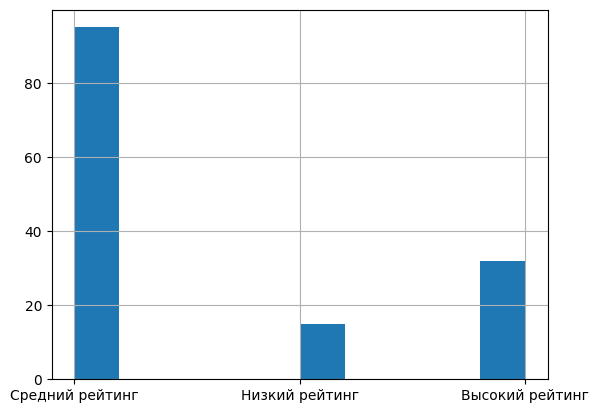

In [ ]:
df_subset["label"].hist()

Задача 3. Разметка вручную

Инструмент разметки label-studio start

Размеченные данные manually_labeled_restaurants1.csv: 14 ресторанов, вручную размеченных как "Высокий рейтинг", "Низкий рейтинг",Средний рейтинг

In [ ]:
manually_labeled_restaurants=zomato.sample(frac=0.002)
manually_labeled_restaurants.to_csv('manually_labeled_restaurants.csv', index=False)
# Разметку  для первых 14 ресторанов в Label Studio.

Задача 4. Объединение размеченных данных




In [ ]:
# Загружаем размеченные вручную данные
manual_df = pd.read_csv('manual.csv')
manual_df = manual_df.rename(columns={'sentiment': 'label'})


In [ ]:
manual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14 non-null     int64  
 1   Unnamed: 0.1           14 non-null     int64  
 2   annotation_id          14 non-null     int64  
 3   annotator              14 non-null     int64  
 4   area                   14 non-null     object 
 5   avg cost (two people)  13 non-null     float64
 6   created_at             14 non-null     object 
 7   cuisines type          14 non-null     object 
 8   id                     14 non-null     int64  
 9   lead_time              14 non-null     float64
 10  local address          14 non-null     object 
 11  num of ratings         14 non-null     int64  
 12  online_order           14 non-null     object 
 13  rate (out of 5)        14 non-null     float64
 14  restaurant name        14 non-null     object 
 15  restaura

In [ ]:
manual_df.head(3)

,Unnamed: 0,Unnamed: 0.1,annotation_id,annotator,area,avg cost (two people),created_at,cuisines type,id,lead_time,local address,num of ratings,online_order,rate (out of 5),restaurant name,restaurant type,label,table booking,updated_at
0,6739,6739,28,1,Bellandur,400.0,2024-05-25T11:23:18.895597Z,"South Indian, North Indian, Chinese",57,1.918,Bellandur,37,Yes,3.7,Udupi Nalapaka,Quick Bites,Средний рейтинг,No,2024-05-25T11:23:18.895597Z
1,5953,5953,29,1,Marathahalli,600.0,2024-05-25T11:23:21.060602Z,"North Indian, South Indian, Chinese",58,1.416,Marathahalli,20,Yes,3.7,Suvai Factory,Casual Dining,Средний рейтинг,Yes,2024-05-25T11:23:21.060602Z
2,1781,1781,30,1,New BEL Road,550.0,2024-05-25T11:23:26.829710Z,"North Indian, Chinese",59,1.915,Yeshwantpur,36,Yes,2.8,Delight Fast Food & Restaurant,Casual Dining,Низкий рейтинг,No,2024-05-25T11:23:26.829710Z


In [ ]:

# # Объединяем с размеченными данными на основе правил
combined_df = pd.concat([df_subset, manual_df], ignore_index=True)
### Объдиняем существующий датасет с датасетом с размещенными вручную со значениями

# combined_df = pd.merge(df_subset, manual_df, on = ['Unnamed: 0','Unnamed: 0.1','restaurant name','avg cost (two people)','online_order','table booking','restaurant type','num of ratings','cuisines type','rate (out of 5)','local address','area'], how = 'inner')

In [ ]:
combined_df.head(3)

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,label,annotation_id,annotator,created_at,id,lead_time,updated_at
0,3638,3638,Loveshack,"Lounge, Cafe",3.9,1717,1600.0,No,Yes,"Continental, Pizza, North Indian, Goan, Burger...",Indiranagar,Domlur,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN
1,4563,4563,Painted Platters,Bakery,3.9,38,300.0,No,No,"Bakery, Desserts",Church Street,Ulsoor,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN
2,6073,6073,Tandurust,"Takeaway, Delivery",3.6,27,300.0,No,No,"North Indian, South Indian",Bellandur,Bellandur,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           156 non-null    int64  
 1   Unnamed: 0             156 non-null    int64  
 2   restaurant name        156 non-null    object 
 3   restaurant type        156 non-null    object 
 4   rate (out of 5)        156 non-null    float64
 5   num of ratings         156 non-null    int64  
 6   avg cost (two people)  155 non-null    float64
 7   online_order           156 non-null    object 
 8   table booking          156 non-null    object 
 9   cuisines type          156 non-null    object 
 10  area                   156 non-null    object 
 11  local address          156 non-null    object 
 12  label                  156 non-null    object 
 13  annotation_id          14 non-null     float64
 14  annotator              14 non-null     float64
 15  create

In [ ]:

combined_df.loc[combined_df["label"]=="Высокий рейтинг", 'label_rate'] = 1
combined_df.loc[combined_df["label"]=="Средний рейтинг",'label_rate'] = 0
combined_df.loc[combined_df["label"]=="Низкий рейтинг", 'label_rate'] = -1


In [ ]:
combined_df.head(5)

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,label,annotation_id,annotator,created_at,id,lead_time,updated_at,label_rate
0,3638,3638,Loveshack,"Lounge, Cafe",3.9,1717,1600.0,No,Yes,"Continental, Pizza, North Indian, Goan, Burger...",Indiranagar,Domlur,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,4563,4563,Painted Platters,Bakery,3.9,38,300.0,No,No,"Bakery, Desserts",Church Street,Ulsoor,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,6073,6073,Tandurust,"Takeaway, Delivery",3.6,27,300.0,No,No,"North Indian, South Indian",Bellandur,Bellandur,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2420,2420,Grand Chillies,Quick Bites,3.4,7,400.0,No,No,"North Indian, Chinese, Biryani","Byresandra,Tavarekere,Madiwala",HSR,Средний рейтинг,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2550,2550,Hare Krishna,Quick Bites,2.9,16,300.0,No,No,"North Indian, South Indian, Chinese",Rajajinagar,Majestic,Низкий рейтинг,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


Задача 5. Обучение модели машинного обучения

Модель: Логистическая регрессия

Обучение:

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    combined_df['label'], # оценка ресторана - будет использоваться как входные данные
    combined_df['label_rate'], # помечаем меткой классов (положительный или отрицательный )
    test_size=0.2, # определяем долю данных которая попадет в тест (20%)
    random_state=42 # Создаем зерно генератора случайных чисел для воспроизводимости результатов
)



In [ ]:
pipeline = Pipeline([
('tfidf', TfidfVectorizer(stop_words='english')), # векторизация текста, с исключением стоп слов англ языка, этот вариант я подсмотрела
('clf', LogisticRegression(max_iter=1000)) # модель логистической регресии с увелечинным колличеством итераций до 1000
])

In [ ]:
pipeline = LogisticRegression()

In [ ]:
#Обучение модели на обучающем наборе данных
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [ ]:
predictions = pipeline.predict(X_test) # предсказание модели на тестовых данных
accuracy = accuracy_score(y_test, predictions) # расчет точности модели
report = classification_report(y_test, predictions) # оценка качесвта предсказания
print(f"Точность модели {accuracy}")
print('Отчет по классификации')
print(report)

Точность модели 1.0
Отчет по классификации
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         4
         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



Задача 6. Оценка модели

Метрики оценки: Точность, полнота, F1-мера

Оценка:

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper left')
plt.show()